### Závěrečný projekt - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, dispozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
3. Datová analýza - analýza dat
- Třetí část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou dispozice (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou dispozice?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ dispozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou dispozici bytu. Která dispozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


Dotazy zodpovězte ve vašem pracovním notebooku a výsledný soubor nahrajte na GitHub.


### WebScraping

In [75]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

strana = 1
list_bytu = []
while True:
    response = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/zlin?strana={strana}').text
    soup = BeautifulSoup(response, "html.parser")

    vsechny_byty = soup.find_all(name="li", class_="MuiGrid2-root")

    for byt in vsechny_byty:
        cast_odkazu = byt.find("a", class_="MuiTypography-root")
        if cast_odkazu is None:
            continue
        plny_odkaz = "https://www.sreality.cz/" + cast_odkazu["href"]
        vsechny_radky = byt.find_all("p")
        prvni_radek = vsechny_radky[0].text.strip()
        radek_casti = prvni_radek.split(" ")

        if len(radek_casti) >= 4:
            kompozice = radek_casti[2]
            velikost = radek_casti[3].replace("\xa0", "").strip()
        else:
            kompozice = ""
            velikost = ""
        radek_ceny = byt.find("p",class_="css-ca9wwd")
        if radek_ceny is None:
            continue
        cena = radek_ceny.text.replace("\xa0", "").strip()
        lokace = vsechny_radky[1].text
        if ", " in lokace:
            ulice, mesto = lokace.split(", ", 1)
        else:
            ulice = ""
            mesto = lokace
        
        objekt = {
            "Odkaz": plny_odkaz,
            "Rozměry bytu": velikost,   
            "Dispozice bytu": kompozice,
            "Cena bytu": cena,
            "Město": mesto, 
            "Ulice": ulice,
        }

        list_bytu.append(objekt)

    tlacitko = soup.find('button', attrs={"aria-label": "Další stránka"})
    if tlacitko is None:
        print("Tlačítko 'Další stránka' nenalezeno - končím.")
        break
    else:
        strana += 1

print(list_bytu)

df = pd.DataFrame(list_bytu)
df.to_csv("Martina_Marton_zdrojova_data.csv",index=False, encoding="utf-8-sig")


Tlačítko 'Další stránka' nenalezeno - končím.
[{'Odkaz': 'https://www.sreality.cz//detail/pronajem/byt/1+kk/zlin-zlin-vetrna/2431017548', 'Rozměry bytu': '26m²', 'Dispozice bytu': '1+kk', 'Cena bytu': '8900Kč/měsíc', 'Město': 'Zlín', 'Ulice': 'Větrná'}, {'Odkaz': 'https://www.sreality.cz//detail/pronajem/byt/1+kk/zlin-zlin-j-a-bati/2892255820', 'Rozměry bytu': '31m²', 'Dispozice bytu': '1+kk', 'Cena bytu': 'Cena na vyžádání', 'Město': 'Zlín', 'Ulice': 'J. A. Bati'}, {'Odkaz': 'https://www.sreality.cz//detail/pronajem/byt/1+kk/zlin-zlin-zelinova/602452812', 'Rozměry bytu': '37m²', 'Dispozice bytu': '1+kk', 'Cena bytu': '11500Kč/měsíc', 'Město': 'Zlín', 'Ulice': 'Zelinova'}, {'Odkaz': 'https://www.sreality.cz//detail/pronajem/byt/1+kk/slavicin-slavicin-osvobozeni/2048213580', 'Rozměry bytu': '44m²', 'Dispozice bytu': '1+kk', 'Cena bytu': '11000Kč/měsíc', 'Město': 'Slavičín', 'Ulice': 'Osvobození'}, {'Odkaz': 'https://www.sreality.cz//detail/pronajem/byt/1+kk/zlin-zlin-podlesi-ii/15353536

### Datová analýza

In [120]:
import pandas as pd
df = pd.read_csv("Martina_Marton_zdrojova_data.csv")

df.head()

,Odkaz,Rozměry bytu,Dispozice bytu,Cena bytu,Město,Ulice
0,https://www.sreality.cz//detail/pronajem/byt/1...,26m²,1+kk,8900Kč/měsíc,Zlín,Větrná
1,https://www.sreality.cz//detail/pronajem/byt/1...,31m²,1+kk,Cena na vyžádání,Zlín,J. A. Bati
2,https://www.sreality.cz//detail/pronajem/byt/1...,37m²,1+kk,11500Kč/měsíc,Zlín,Zelinova
3,https://www.sreality.cz//detail/pronajem/byt/1...,44m²,1+kk,11000Kč/měsíc,Slavičín,Osvobození
4,https://www.sreality.cz//detail/pronajem/byt/1...,30m²,1+kk,10000Kč/měsíc,Zlín,Podlesí II


Jaká je průměrná cena bytů?

In [141]:
import pandas as pd
df = pd.read_csv("Martina_Marton_zdrojova_data.csv")

df["Cena bytu"] = df["Cena bytu"].str.replace("Kč/měsíc", "").str.strip()
df["Cena bytu"] = pd.to_numeric(df["Cena bytu"], errors="coerce")

prumer = df["Cena bytu"].mean()
print(f"Průměrná cena bytu je {prumer:,.0f} Kč.".replace(",", " "))




Průměrná cena bytu je 13 134 Kč.


Jaká je průměrná cena bytů pro každou dispozice (1+1, 2+1, atp.)? Zobrazte i na grafu.

Dispozice bytu
pokoje       6500.727273
1+1         10437.181818
1+kk        11011.967213
atypický    12000.000000
2+1         12855.128205
bytu        13890.000000
2+kk        15387.083333
3+1         16484.500000
3+kk        17193.750000
4+1         22950.000000
4+kk        34966.666667
Name: Cena bytu, dtype: float64


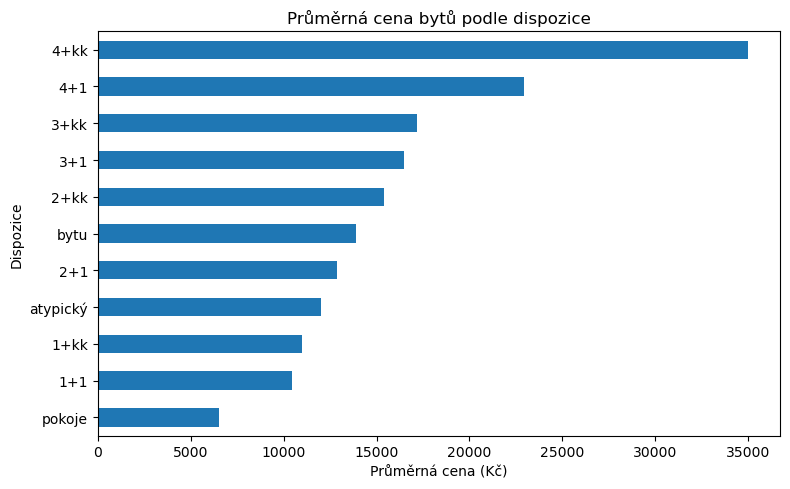

In [220]:
import pandas as pd
df = pd.read_csv("Martina_Marton_zdrojova_data.csv")

df["Cena bytu"] = df["Cena bytu"].str.replace("Kč/měsíc", "").str.strip()
df["Cena bytu"] = pd.to_numeric(df["Cena bytu"], errors="coerce")

df["Dispozice bytu"].unique()

prumery_dispozic = df.groupby("Dispozice bytu")["Cena bytu"].mean().sort_values()
print(prumery_dispozic)

import matplotlib.pyplot as plt

prumery_dispozic.plot(kind="barh", figsize=(8, 5))
plt.xlabel("Průměrná cena (Kč)")
plt.ylabel("Dispozice")
plt.title("Průměrná cena bytů podle dispozice")
plt.tight_layout()
plt.show()


Jaká je průměrná velikost bytu pro každou dispozice?

In [ ]:
import pandas as pd
df = pd.read_csv("Martina_Marton_zdrojova_data.csv")

df["Rozměry bytu"] = (
    df["Rozměry bytu"]
    .str.replace("m²", "", regex=False)                           
)

df["Rozměry bytu"] = pd.to_numeric(df["Rozměry bytu"], errors="coerce")

prumery_velikosti = df.groupby("Dispozice bytu")["Rozměry bytu"].mean().sort_values()

for dispozice, velikost in prumery_velikosti.items():
    print(f"Průměrná velikost bytu dispozice {dispozice} je {velikost:,.0f} m².".replace(",", " "))



Průměrná velikost bytu dispozice 1+kk je 30 m².
Průměrná velikost bytu dispozice 1+1 je 35 m².
Průměrná velikost bytu dispozice pokoje je 42 m².
Průměrná velikost bytu dispozice 2+kk je 51 m².
Průměrná velikost bytu dispozice 2+1 je 58 m².
Průměrná velikost bytu dispozice atypický je 59 m².
Průměrná velikost bytu dispozice 3+kk je 70 m².
Průměrná velikost bytu dispozice 3+1 je 72 m².
Průměrná velikost bytu dispozice 4+1 je 93 m².
Průměrná velikost bytu dispozice 4+kk je 120 m².
Průměrná velikost bytu dispozice bytu je nan m².


Existuje ulice, kde je vyšší koncentrace dražších bytů?

In [212]:
import pandas as pd
df = pd.read_csv("Martina_Marton_zdrojova_data.csv")

df["Cena bytu"] = df["Cena bytu"].str.replace("Kč/měsíc", "").str.strip()
df["Cena bytu"] = pd.to_numeric(df["Cena bytu"], errors="coerce")

df_ulice = df[df["Ulice"].notna()]

statistiky_ulic = df_ulice.groupby("Ulice").agg({
    "Cena bytu": ["mean", "count"]
}).reset_index()

statistiky_ulic.columns = ["Ulice", "Průměrná cena", "Počet bytů"]

statistiky_ulic.sort_values(by="Průměrná cena", ascending=False).reset_index()




,index,Ulice,Průměrná cena,Počet bytů
0,10,Dr. Veselého,36000.0,1
1,95,Vrchy,35000.0,1
2,20,Havlíčkovo nábřeží,30000.0,1
3,65,Partyzánská,23500.0,1
4,60,Okružní,21250.0,2
...,...,...,...,...
112,30,K Majáku,8000.0,1
113,110,Česká,7500.0,2
114,106,třída 3. května,6000.0,1
115,89,Tyršovo nábřeží,5500.0,1


Jaký typ dispozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?

In [223]:
import pandas as pd
df = pd.read_csv("Martina_Marton_zdrojova_data.csv")

df["Dispozice bytu"].value_counts().reset_index()

dispozice_counts = df["Dispozice bytu"].value_counts()

for dispozice, pocet in dispozice_counts.items():
    print(f"Dispozice {dispozice} je inzerována {pocet}×")

nejcastejsi = dispozice_counts.idxmax()
print(f"Nejčastěji inzerovanou dispozicí je: {nejcastejsi}")

Dispozice 1+kk je inzerována 62×
Dispozice 2+1 je inzerována 40×
Dispozice 2+kk je inzerována 24×
Dispozice 1+1 je inzerována 22×
Dispozice 3+1 je inzerována 20×
Dispozice 3+kk je inzerována 17×
Dispozice pokoje je inzerována 11×
Dispozice bytu je inzerována 5×
Dispozice 4+kk je inzerována 3×
Dispozice atypický je inzerována 2×
Dispozice 4+1 je inzerována 2×
Nejčastěji inzerovanou dispozicí je: 1+kk


Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?

In [203]:
import pandas as pd
df = pd.read_csv("Martina_Marton_zdrojova_data.csv")
df["Cena bytu"] = df["Cena bytu"].str.replace("Kč/měsíc", "").str.strip()
df["Cena bytu"] = pd.to_numeric(df["Cena bytu"], errors="coerce")

drazsi_byty = df[df["Cena bytu"] > 20000]
print(drazsi_byty["Dispozice bytu"].value_counts())

if any(drazsi_byty["Dispozice bytu"].isin(["2+1", "2+kk"])):
    print("Ano, i dvoupokojové byty jsou inzerovány za cenu nad 20 000 Kč.")
else:
    print("Ne, dvoupokojové byty nejsou mezi těmi dražšími než 20 000 Kč.")

Dispozice bytu
4+kk    3
2+kk    3
3+kk    2
4+1     2
3+1     2
Name: count, dtype: int64
Ano, i dvoupokojové byty jsou inzerovány za cenu nad 20 000 Kč.


Zjištěte minimální a maximální inzerce pro každou dispozici bytu. Která dispozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?

In [238]:
import pandas as pd
df = pd.read_csv("Martina_Marton_zdrojova_data.csv")
df["Cena bytu"] = df["Cena bytu"].str.replace("Kč/měsíc", "").str.strip()
df["Cena bytu"] = pd.to_numeric(df["Cena bytu"], errors="coerce")

rozsahy = df.groupby("Dispozice bytu")["Cena bytu"].agg(["min", "max"])

rozsahy["Rozptyl"] = rozsahy["max"] - rozsahy["min"]
nejvetsi_rozptyl = rozsahy["Rozptyl"].idxmax()

print(nejvetsi_rozptyl)

rozsahy.sort_values(by="Rozptyl", ascending=False).reset_index()



3+kk


,Dispozice bytu,min,max,Rozptyl
0,3+kk,6000.0,36000.0,30000.0
1,3+1,10000.0,25000.0,15000.0
2,2+kk,9000.0,23900.0,14900.0
3,1+kk,8000.0,19900.0,11900.0
4,2+1,8000.0,18000.0,10000.0
5,4+kk,30000.0,39900.0,9900.0
6,atypický,8500.0,15500.0,7000.0
7,pokoje,3500.0,10500.0,7000.0
8,bytu,11450.0,17000.0,5550.0
9,1+1,8000.0,13500.0,5500.0
